In [14]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from gait_dataset import GaitDataset
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14

import numpy as np
import pandas as pd
from cmap import Colormap

Text(0.5, 0.92, 'Oxene PCA')

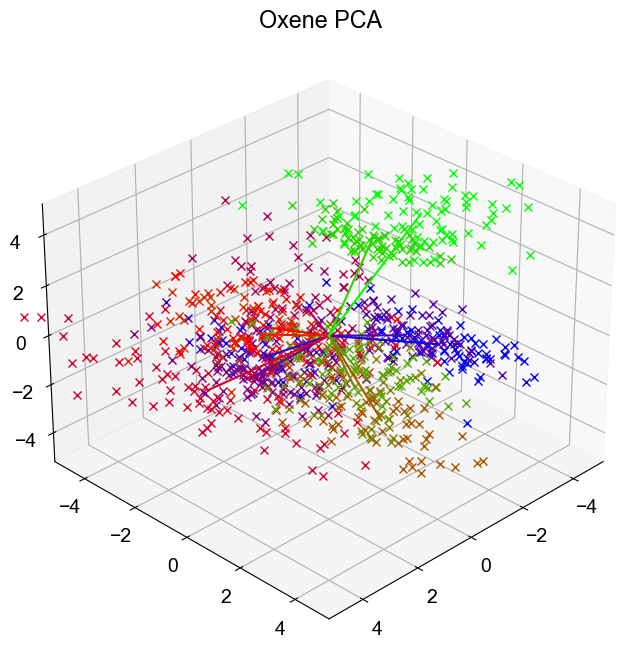

In [76]:
ds = torch.load('dataset/gait_o.pt')

features_min = np.min(ds.features.numpy(), axis=2)
features_max = np.max(ds.features.numpy(), axis=2)
features_avg = np.mean(ds.features.numpy(), axis=2)
x = np.column_stack((features_min, features_max, features_avg))
y = ds.labels.numpy()

x = StandardScaler().fit_transform(x)

pca_o = PCA(n_components=4)
principle_components_o = pca_o.fit_transform(x)

group_centers = []
for label in np.unique(y):
    group_centers.append(np.mean(principle_components_o[y == label], axis=0))

colors = Colormap('matplotlib:brg')(np.linspace(0, 1, len(np.unique(y))))

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)

for idx, pc in enumerate(principle_components_o):
    ax.plot(pc[0], pc[1], pc[2], 'x',
            c=colors[int(y[idx])])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)

for idx, gc in enumerate(group_centers):
    ax.plot((0, gc[0]),
            (0, gc[1]),
            (0, gc[2]),
            c=colors[idx])

plt.title('Oxene PCA')

In [77]:
print(pca_o.explained_variance_ratio_)
print(pca_o.explained_variance_ratio_.sum())

[0.2696868  0.16423619 0.12551617 0.08087511]
0.6403142748419338


Text(0.5, 0.92, 'Mxene PCA')

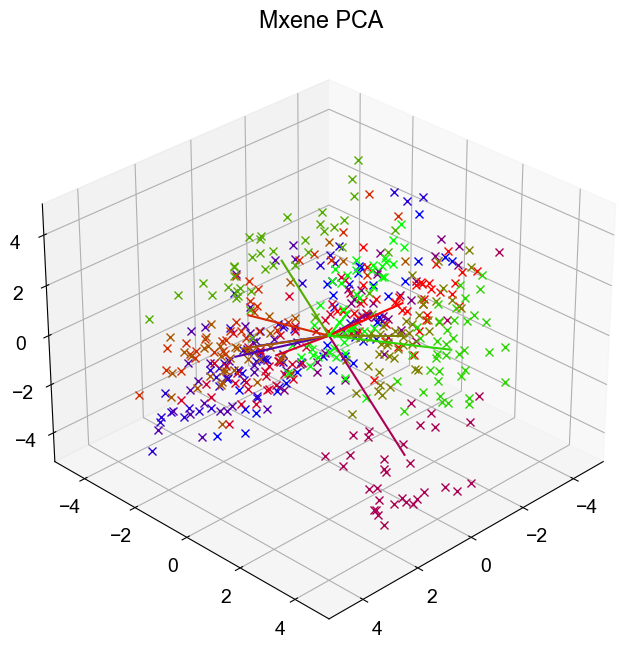

In [80]:
ds = torch.load('dataset/gait_m2.pt')

features_min = np.min(ds.features.numpy(), axis=2)
features_max = np.max(ds.features.numpy(), axis=2)
features_avg = np.mean(ds.features.numpy(), axis=2)
x = np.column_stack((features_min, features_max, features_avg))
y = ds.labels.numpy()

x = StandardScaler().fit_transform(x)

pca_m = PCA(n_components=4)
principle_components_m = pca_m.fit_transform(x)

group_centers = []
for label in np.unique(y):
    group_centers.append(np.mean(principle_components_m[y == label], axis=0))

colors = Colormap('matplotlib:brg')(np.linspace(0, 1, len(np.unique(y))))

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=45)

for idx, pc in enumerate(principle_components_m):
    ax.plot(pc[0], pc[1], pc[2], 'x',
            c=colors[int(y[idx])])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)

for idx, gc in enumerate(group_centers):
    ax.plot((0, gc[0]),
            (0, gc[1]),
            (0, gc[2]),
            c=colors[idx])
    
plt.title('Mxene PCA')

In [81]:
print(pca_m.explained_variance_ratio_)
print(pca_m.explained_variance_ratio_.sum())

[0.25570628 0.14825029 0.12286856 0.09421137]
0.6210365013073109
